In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

#Load Dataset

In [10]:
df = pd.read_csv("/content/bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


#Basic Overview

In [12]:
print("Dataset Shape:", df.shape)
print("\nConversion Distribution:")
print(df['y'].value_counts())

Dataset Shape: (45211, 17)

Conversion Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


#Funnel Construction

In [13]:
total_customers = df.shape[0]
contacted_customers = df[df['campaign'] > 0].shape[0]
converted_customers = df[df['y'] == 'yes'].shape[0]

print("Total Customers:", total_customers)
print("Contacted Customers:", contacted_customers)
print("Converted Customers:", converted_customers)

Total Customers: 45211
Contacted Customers: 45211
Converted Customers: 5289


#Conversion Rates

In [14]:
contact_rate = contacted_customers / total_customers
conversion_rate = converted_customers / contacted_customers
overall_conversion = converted_customers / total_customers

print("Contact Rate:", round(contact_rate*100,2), "%")
print("Conversion Rate (Contact → Yes):", round(conversion_rate*100,2), "%")
print("Overall Conversion Rate:", round(overall_conversion*100,2), "%")

Contact Rate: 100.0 %
Conversion Rate (Contact → Yes): 11.7 %
Overall Conversion Rate: 11.7 %


#Funnel Chart

In [15]:
funnel_df = pd.DataFrame({
    "Stage": ["Total Customers", "Contacted", "Converted"],
    "Count": [total_customers, contacted_customers, converted_customers]
})

fig = px.funnel(funnel_df, x='Count', y='Stage', title="Marketing Funnel")
fig.show()

#Conversion by Job

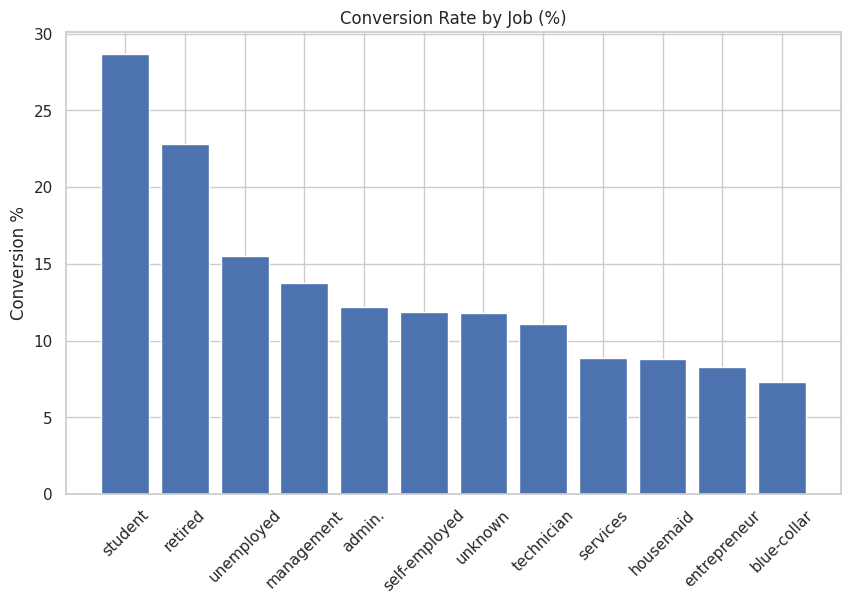

In [16]:
job_conversion = pd.crosstab(df['job'], df['y'], normalize='index') * 100

job_conversion = job_conversion.sort_values('yes', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(job_conversion.index, job_conversion['yes'])
plt.xticks(rotation=45)
plt.title("Conversion Rate by Job (%)")
plt.ylabel("Conversion %")
plt.show()

#Conversion by Contact Type

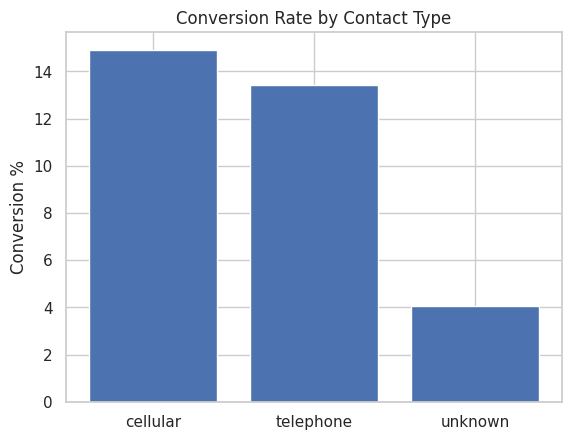

In [17]:
contact_conversion = pd.crosstab(df['contact'], df['y'], normalize='index') * 100

plt.figure()
plt.bar(contact_conversion.index, contact_conversion['yes'])
plt.title("Conversion Rate by Contact Type")
plt.ylabel("Conversion %")
plt.show()

#Monthly Conversion Analysis

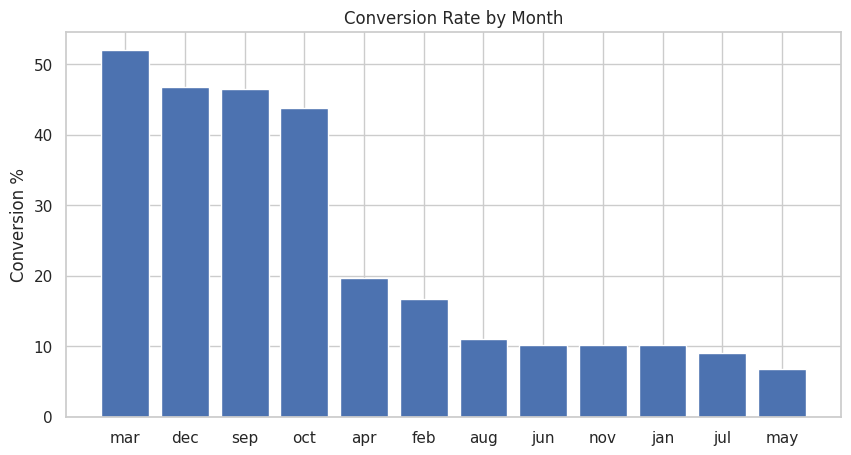

In [18]:
month_conversion = pd.crosstab(df['month'], df['y'], normalize='index') * 100
month_conversion = month_conversion.sort_values('yes', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(month_conversion.index, month_conversion['yes'])
plt.title("Conversion Rate by Month")
plt.ylabel("Conversion %")
plt.show()

#Campaign Call Impact

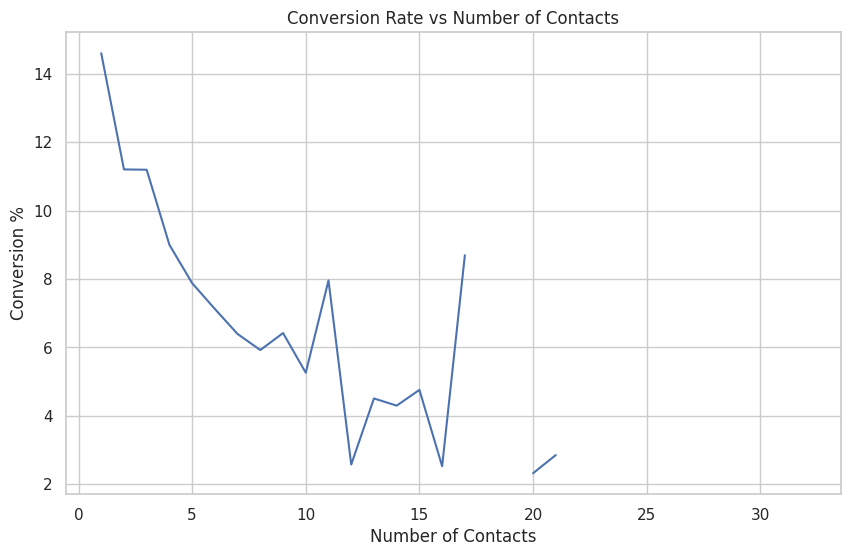

In [19]:
campaign_analysis = df.groupby('campaign')['y'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(10,6))
plt.plot(campaign_analysis.index, campaign_analysis['yes'])
plt.title("Conversion Rate vs Number of Contacts")
plt.xlabel("Number of Contacts")
plt.ylabel("Conversion %")
plt.show()

#Age vs Conversion

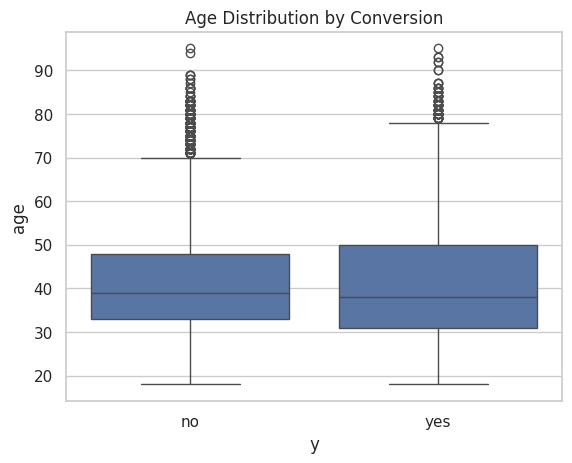

In [20]:
plt.figure()
sns.boxplot(x='y', y='age', data=df)
plt.title("Age Distribution by Conversion")
plt.show()

#Dashboard-Style KPI Summary

In [21]:
print("=========== KPI SUMMARY ===========")
print("Total Customers:", total_customers)
print("Converted Customers:", converted_customers)
print("Overall Conversion Rate:", round(overall_conversion*100,2), "%")
print("Best Performing Month:", month_conversion['yes'].idxmax())
print("Best Performing Job:", job_conversion['yes'].idxmax())
print("Best Contact Type:", contact_conversion['yes'].idxmax())

=========== KPI SUMMARY ===========
Total Customers: 45211
Converted Customers: 5289
Overall Conversion Rate: 11.7 %
Best Performing Month: mar
Best Performing Job: student
Best Contact Type: cellular
